# NEST Tutorial | Part 1: Neurons and simple neural networks

Plot configuration

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

plt.style.use(["science"])
# mpl.rcParams["font.serif"] = ["Times New Roman"]


### 1. Creating nodes

Two basic elements:
* Nodes - neurons, devices or subnetworks. Devices stimulates or records them.
* Connections


**Create nodes** are created using Create(), returning a NodeCollection:

In [9]:
import matplotlib.pyplot as plt
import nest
neuron = nest.Create("iaf_psc_alpha")


**View** neuron parameters by calling .get(). If called on a NodeCollection, a list of dicts are returned. Here, we get
* I_e : the constant background current
* V_{reset, threshold} : reset/threshold potential of the neuron

In [13]:

neuron.get(["V_reset", "V_th", "I_e"])

{'V_reset': -70.0, 'V_th': -55.0, 'I_e': 0.0}

**Set** node parameters by calling .set() or setting an attribute value. 
NEST is type sensitive.

In [17]:
neuron.set({"I_e": 375.0})

neuron.I_e = 376.0

Device are created and connected by configuring which "ports" it should listen on follows:

In [19]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

spikerecorder = nest.Create("spike_recorder")

### 2. Connecting nodes with default connections

Let's connect nodes.

In [20]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

The network is stimulated by running

In [21]:
nest.Simulate(1000.0)


Mar 27 11:55:27 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Mar 27 11:55:27 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 27 11:55:27 SimulationManager::run [Info]: 
    Simulation finished.


### 3. Extracting and plotting data from devices

After the simulation, we can obtain the data recorded:

In [36]:
dmm = multimeter.get()      # Status parameters
Vms = dmm["events"]["V_m"]  # Voltage
ts = dmm["events"]["times"] # Time

dSD = spikerecorder.get("events")
evs_sr = dSD["senders"]
ts_sr = dSD["times"]

Plot the data using matplotlib

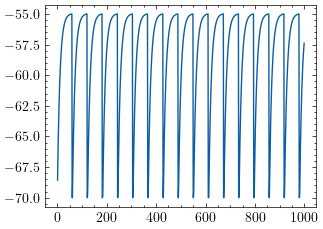

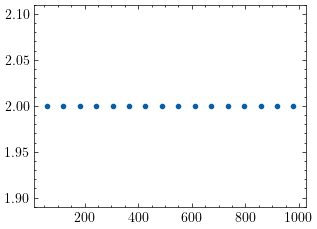

In [42]:
plt.figure(1)
plt.plot(ts, Vms)

plt.figure(2)
plt.plot(ts_sr, evs_sr, ".")
plt.show()

Recording multiple neurons on the same multimeter requires the data to be split using strides

In [45]:
neuron2 = nest.Create("iaf_psc_alpha")
neuron2.set({"I_e": 370.0})

nest.Connect(multimeter, neuron2)

In [46]:
nest.Simulate(1000.0)


Mar 27 12:05:09 NodeManager::prepare_nodes [Info]: 
    Preparing 8 nodes for simulation.

Mar 27 12:05:09 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 8
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 27 12:05:09 SimulationManager::run [Info]: 
    Simulation finished.


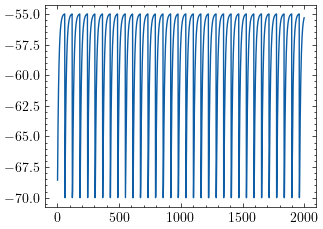

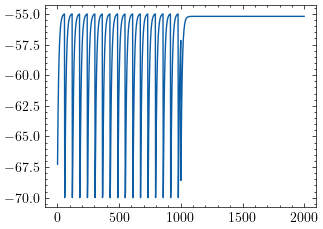

In [52]:
plt.figure(1)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
plt.plot(ts1, Vms1)

plt.figure(2)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
plt.plot(ts2, Vms2)

plt.show()

### 4. Connecting nodes with specific connections

In [75]:
nest.ResetKernel()

We now adapt the previous example so that the neuron recieves 2 Poisson spike trains, one excitatory and the other inhibitory.

The rates are in Hz

In [76]:
noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")

noise_ex.set(rate=80000.0)
noise_in.set(rate=15000.0)

The constant input current is set to 0

In [77]:
neuron = nest.Create("iaf_psc_alpha")
neuron.set(I_e=0.0)

multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

spikerecorder = nest.Create("spike_recorder")

We want the generators to produce the following amplitudes: 
* Excitatory generator -> 1.2pA amplitude
* Inhibitory event -> -2.0pA amplitude

The synpatic weights are set in a dict, and passed as a kwarg to the Connect() method.

In [78]:
syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}

nest.Connect(noise_ex, neuron, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron, syn_spec=syn_dict_in)

nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [79]:
nest.Simulate(1000.0)


Mar 27 12:14:55 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Mar 27 12:14:55 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 27 12:14:55 SimulationManager::run [Info]: 
    Simulation finished.


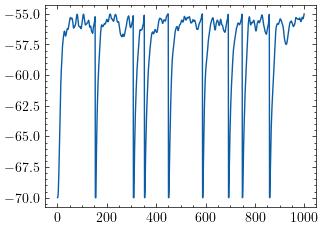

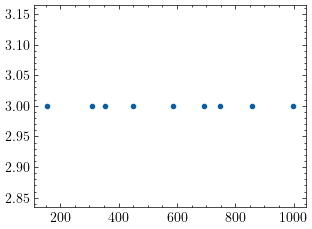

In [80]:
dmm = multimeter.get()      # Status parameters
Vms = dmm["events"]["V_m"]  # Voltage
ts = dmm["events"]["times"] # Time

dSD = spikerecorder.get("events")
evs_sr = dSD["senders"]
ts_sr = dSD["times"]

plt.figure(1)
plt.plot(ts, Vms)

plt.figure(2)
plt.plot(ts_sr, evs_sr, ".")
plt.show()

### 5. Two connected neurons

In [93]:
nest.ResetKernel()

Let's connect two neurons

In [94]:
neuron1 = nest.Create("iaf_psc_alpha")
neuron1.set(I_e=376.0)

neuron2 = nest.Create("iaf_psc_alpha")

multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

We now 
* connect neuron_1 -> neuron_2
* record the membrane potential from neuron_2
* and observe the postsynaptic potentials caused by the spikes of neuron_1

In [95]:
nest.Connect(neuron1, neuron2, syn_spec = {"weight":20.0})
nest.Connect(multimeter, neuron2)

In [96]:
nest.Simulate(1000.0)


Mar 27 12:19:29 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Mar 27 12:19:29 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Mar 27 12:19:29 SimulationManager::run [Info]: 
    Simulation finished.


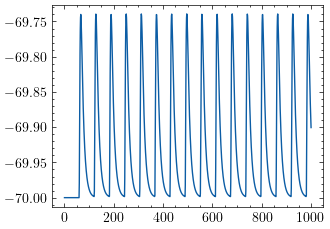

In [97]:
dmm = multimeter.get()      # Status parameters
Vms = dmm["events"]["V_m"]  # Voltage
ts = dmm["events"]["times"] # Time

plt.figure(1)
plt.plot(ts, Vms)

plt.show()